## Let us prepare the data

In [1]:
import pandas as pd

In [2]:
irs_data = pd.read_csv('Files/16zpallnoagi.csv')
fipzip = pd.read_csv('Files/ZIP-COUNTY.csv')

In [3]:
def map_fipzip(input_df, fipzip_df):
    """taking a df as input and mapping the zip code to fip code"""
    fipzip = pd.Series(fipzip_df.STCOUNTYFP.values,index=fipzip_df.ZIPCODE).to_dict()
    fipzip = {int(k):int(v) for k,v in fipzip.items()}
    input_df['STATEFIPS'] = input_df['ZIPCODE'].map(fipzip)
    input_df = input_df.dropna(axis=0, how='any')
    return input_df

In [4]:
irs_df = map_fipzip(irs_data, fipzip)
irs_df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
1,1115.0,AL,35004,0,5210,2150,2140,830,2470,10510,...,4140,28671,0,0,30,20,930,3022,4130,11001
2,1073.0,AL,35005,0,3100,1340,890,830,1740,6020,...,2180,9262,0,0,0,0,430,860,2600,7364
3,1127.0,AL,35006,0,1200,430,600,170,790,2560,...,910,4982,0,0,0,0,180,315,1010,2873
4,1117.0,AL,35007,0,11940,4770,5140,1750,5450,24950,...,9340,75822,90,79,90,83,2590,9648,8950,23317
5,1123.0,AL,35010,0,7910,2910,2730,2120,4090,16330,...,5170,41011,70,133,90,351,1210,4343,6410,19769


In [5]:
irs_df = irs_df.groupby(['STATEFIPS'], as_index=False).agg({'A02650' : sum, 'N2': sum})
irs_df.head()

,STATEFIPS,A02650,N2
0,1001.0,33560,1480
1,1003.0,5835401,178360
2,1005.0,80761,4660
3,1007.0,52266,2840
4,1009.0,235132,11450


In [6]:
irs_df['w_income'] = irs_df['A02650']/irs_df['N2']
irs_df = irs_df.drop(['A02650', 'N2'], axis=1)
irs_df.head()

,STATEFIPS,w_income
0,1001.0,22.675676
1,1003.0,32.716983
2,1005.0,17.330687
3,1007.0,18.403521
4,1009.0,20.535546


In [7]:
foodatlas = pd.read_csv('Files/foodatlas.csv', index_col=0)
foodatlas = foodatlas.rename(index=str, columns={"FIPS": "STATEFIPS"})
foodatlas.head()

,STATEFIPS,State,County,PCT_LACCESS_POP15,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD15,PCT_LACCESS_SENIORS15,GROCPTH14,...,FSRPTH14,PC_FFRSALES12,PC_FSRSALES12,REDEMP_SNAPS16,PCT_SNAP16,PCT_NSLP15,FMRKTPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFACPTH14
0,1001,AL,Autauga,32.062255,11.991125,3.351332,4.608749,8.460485,3.996279,0.072209,...,0.523513,674.80272,512.280987,239024.0156,16.976436,10.934529,0.018045,13.0,34.1,0.090261
1,1003,AL,Baldwin,16.767489,5.424427,1.905114,1.298900,3.844936,3.061840,0.144920,...,1.104387,674.80272,512.280987,155844.3902,16.976436,10.934529,0.019179,10.4,27.4,0.124931
2,1005,AL,Barbour,22.105560,10.739667,4.329378,4.303147,3.758341,3.001695,0.185963,...,0.557890,674.80272,512.280987,281716.3260,16.976436,10.934529,0.154054,18.4,44.4,0.000000
3,1007,AL,Bibb,4.230324,2.601627,2.821427,0.676710,1.015242,0.600865,0.222163,...,0.222163,674.80272,512.280987,256026.9197,16.976436,10.934529,0.044164,14.8,40.3,0.044433
4,1009,AL,Blount,6.497380,2.880150,3.336414,0.812727,1.588720,0.882583,0.103952,...,0.259880,674.80272,512.280987,141304.9007,16.976436,10.934529,0.017330,14.1,34.6,0.051976


In [8]:
foodatlas = foodatlas.drop(['PCT_LACCESS_LOWI15', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_SNAP15', 'PCT_LACCESS_CHILD15',
                           'PCT_LACCESS_SENIORS15', 'PC_FFRSALES12', 'PC_FSRSALES12'], axis=1)

In [9]:
#Merging IRS data with FoodAtlas with key=STATEFIPS
df = pd.merge(irs_df, foodatlas, on='STATEFIPS')
df = df.drop(['State','County'],axis=1)
df.isnull().sum()

STATEFIPS                  0
w_income                   0
PCT_LACCESS_POP15         19
GROCPTH14                  0
SUPERCPTH14                0
CONVSPTH14                 0
SPECSPTH14                 0
SNAPSPTH16                21
WICSPTH12                  0
FFRPTH14                   0
FSRPTH14                   0
REDEMP_SNAPS16           163
PCT_SNAP16                 0
PCT_NSLP15                 0
FMRKTPTH16                 0
PCT_DIABETES_ADULTS13      0
PCT_OBESE_ADULTS13         0
RECFACPTH14                0
dtype: int64

In [10]:
# Impute missing values with mean

import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df)
df_imp = imp.transform(df)

df_new = pd.DataFrame(data = df_imp)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1001.0,22.675676,32.062255,0.072209,0.018052,0.541565,0.036104,0.760911,0.090067,0.649878,0.523513,239024.0156,16.976436,10.934529,0.018045,13.0,34.1,0.090261
1,1003.0,32.716983,16.767489,0.144920,0.029983,0.589673,0.129928,0.949753,0.141517,0.659634,1.104387,155844.3902,16.976436,10.934529,0.019179,10.4,27.4,0.124931
2,1005.0,17.330687,22.105560,0.185963,0.037193,0.706661,0.074385,1.354387,0.257344,0.818239,0.557890,281716.3260,16.976436,10.934529,0.154054,18.4,44.4,0.000000
3,1007.0,18.403521,4.230324,0.222163,0.044433,0.666489,0.044433,0.864874,0.221268,0.222163,0.222163,256026.9197,16.976436,10.934529,0.044164,14.8,40.3,0.044433
4,1009.0,20.535546,6.497380,0.103952,0.017325,0.467784,0.000000,0.815946,0.103760,0.363832,0.259880,141304.9007,16.976436,10.934529,0.017330,14.1,34.6,0.051976


In [11]:
df['PCT_LACCESS_POP15'] = df_new[2]
df['SNAPSPTH16'] = df_new[7]
df['REDEMP_SNAPS16'] = df_new[13]

df.isnull().sum()

STATEFIPS                0
w_income                 0
PCT_LACCESS_POP15        0
GROCPTH14                0
SUPERCPTH14              0
CONVSPTH14               0
SPECSPTH14               0
SNAPSPTH16               0
WICSPTH12                0
FFRPTH14                 0
FSRPTH14                 0
REDEMP_SNAPS16           0
PCT_SNAP16               0
PCT_NSLP15               0
FMRKTPTH16               0
PCT_DIABETES_ADULTS13    0
PCT_OBESE_ADULTS13       0
RECFACPTH14              0
dtype: int64

In [12]:
region = pd.read_csv('Files/fip to region.csv', index_col=0)
df = pd.merge(df, region, on='STATEFIPS')
df.head()

,STATEFIPS,w_income,PCT_LACCESS_POP15,GROCPTH14,SUPERCPTH14,CONVSPTH14,SPECSPTH14,SNAPSPTH16,WICSPTH12,FFRPTH14,FSRPTH14,REDEMP_SNAPS16,PCT_SNAP16,PCT_NSLP15,FMRKTPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFACPTH14,Region,Region_id
0,1001.0,22.675676,32.062255,0.072209,0.018052,0.541565,0.036104,0.760911,0.090067,0.649878,0.523513,10.934529,16.976436,10.934529,0.018045,13.0,34.1,0.090261,South,3
1,1003.0,32.716983,16.767489,0.144920,0.029983,0.589673,0.129928,0.949753,0.141517,0.659634,1.104387,10.934529,16.976436,10.934529,0.019179,10.4,27.4,0.124931,South,3
2,1005.0,17.330687,22.105560,0.185963,0.037193,0.706661,0.074385,1.354387,0.257344,0.818239,0.557890,10.934529,16.976436,10.934529,0.154054,18.4,44.4,0.000000,South,3
3,1007.0,18.403521,4.230324,0.222163,0.044433,0.666489,0.044433,0.864874,0.221268,0.222163,0.222163,10.934529,16.976436,10.934529,0.044164,14.8,40.3,0.044433,South,3
4,1009.0,20.535546,6.497380,0.103952,0.017325,0.467784,0.000000,0.815946,0.103760,0.363832,0.259880,10.934529,16.976436,10.934529,0.017330,14.1,34.6,0.051976,South,3


In [13]:
df.describe()

,STATEFIPS,w_income,PCT_LACCESS_POP15,GROCPTH14,SUPERCPTH14,CONVSPTH14,SPECSPTH14,SNAPSPTH16,WICSPTH12,FFRPTH14,FSRPTH14,REDEMP_SNAPS16,PCT_SNAP16,PCT_NSLP15,FMRKTPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFACPTH14,Region_id
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,30438.798416,27.849960,23.016920,0.251460,0.018398,0.594123,0.051616,0.935115,0.230189,0.575923,0.781881,10.231539,13.329789,10.231539,0.058604,11.228472,31.017189,0.069167,2.663807
std,15185.272980,8.749448,19.104924,0.216981,0.023094,0.311868,0.073055,0.376870,0.212055,0.305304,0.580239,1.790940,3.195221,1.790940,0.098527,2.492331,4.535603,0.071663,0.809681
min,1001.000000,10.114795,0.000000,0.000000,0.000000,0.000000,0.000000,0.118901,0.000000,0.000000,0.000000,6.668917,5.817753,6.668917,0.000000,3.300000,11.800000,0.000000,1.000000
25%,19004.000000,22.516084,11.206076,0.139170,0.000000,0.398224,0.000000,0.692630,0.118842,0.413322,0.495019,8.580161,10.961725,8.580161,0.000000,9.500000,28.300000,0.000000,2.000000
50%,29187.000000,26.256937,19.396885,0.194761,0.014534,0.542089,0.037952,0.885533,0.176564,0.577162,0.678642,10.396466,13.527693,10.396466,0.029784,11.100000,31.200000,0.061424,3.000000
75%,45074.000000,31.076574,28.822676,0.284472,0.029023,0.720791,0.075208,1.111491,0.267021,0.731797,0.903373,11.870195,15.440571,11.870195,0.071979,12.900000,33.800000,0.106552,3.000000
max,56045.000000,129.933024,100.000001,3.149606,0.248077,4.601227,1.390821,6.047171,2.994012,5.555556,13.888889,12.853770,22.763699,12.853770,1.445087,23.500000,47.600000,0.822368,4.000000


In [14]:
df_south = df.loc[df['Region'] == 'South']
df_west = df.loc[df['Region'] == 'West']
df_midwest = df.loc[df['Region'] == 'Midwest']
df_northeast = df.loc[df['Region'] == 'Northeast']

## <u> Data is ready for analysis</u>

## We plot distribution of per capita income, diabetes rate and obesity rate across the US on a map

In [15]:
from bs4 import BeautifulSoup

In [16]:
# Load the SVG map
svg = open('Files/counties.svg', 'r').read()

soup = BeautifulSoup(svg)

paths = soup.findAll('path')

income = {}

for index, row in df.iterrows():
    if (row['STATEFIPS'] > 10000):
        fips = "FIPS_" + str(int(row['STATEFIPS']))
    else:
        fips = "FIPS_" + "0" + str(int(row['STATEFIPS']))
    w_income = row['w_income']
    income[fips] = w_income

# Map colors
colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]
 
# County style
path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1;stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;marker-start:none;stroke-linejoin:bevel;fill:'
 
# Color the counties based on income rate
for p in paths:
     
    if p['id'] not in ["State_Lines", "separator"]:
        try:
            w_income = income[p['id']]
        except:
            continue
 
        if w_income > 35:
            color_class = 5
        elif w_income > 25:
            color_class = 4
        elif w_income > 17.5:
            color_class = 3
        elif w_income > 12.5:
            color_class = 2
        elif w_income > 7.5:
            color_class = 1
        else:
            color_class = 0

        color = colors[color_class]
        p['style'] = path_style + color
 
f = open('income.svg', 'w')
print(soup.prettify(), file=f)
f.close()

In [17]:
# from IPython.core.display import SVG
# SVG(filename='income.svg')

In [18]:
# Load the SVG map
svg = open('Files/counties.svg', 'r').read()

soup = BeautifulSoup(svg)

paths = soup.findAll('path')

diabetes = {}

for index, row in df.iterrows():
    if (row['STATEFIPS'] > 10000):
        fips = "FIPS_" + str(int(row['STATEFIPS']))
    else:
        fips = "FIPS_" + "0" + str(int(row['STATEFIPS']))
    PCT_DIABETES_ADULTS13 = row['PCT_DIABETES_ADULTS13']
    diabetes[fips] = PCT_DIABETES_ADULTS13

# Map colors
colors = ["#eff3ff", "#c6dbef", "#9ecae1", "#6baed6", "#3182bd", "#08519c"]
 
# County style
path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1;stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;marker-start:none;stroke-linejoin:bevel;fill:'
 
# Color the counties based on income rate
for p in paths:
     
    if p['id'] not in ["State_Lines", "separator"]:
        try:
            PCT_DIABETES_ADULTS13 = diabetes[p['id']]
        except:
            continue
 
        if PCT_DIABETES_ADULTS13 > 20:
            color_class = 5
        elif PCT_DIABETES_ADULTS13 > 15:
            color_class = 4
        elif PCT_DIABETES_ADULTS13 > 13:
            color_class = 3
        elif PCT_DIABETES_ADULTS13 > 11:
            color_class = 2
        elif PCT_DIABETES_ADULTS13 > 8.5:
            color_class = 1
        else:
            color_class = 0

        color = colors[color_class]
        p['style'] = path_style + color
 
f = open('diabetes.svg', 'w')
print(soup.prettify(), file=f)
f.close()

In [19]:
# from IPython.core.display import SVG
# SVG(filename='diabetes.svg')

In [20]:
# Load the SVG map
svg = open('Files/counties.svg', 'r').read()

soup = BeautifulSoup(svg)

paths = soup.findAll('path')

obesity = {}

for index, row in df.iterrows():
    if (row['STATEFIPS'] > 10000):
        fips = "FIPS_" + str(int(row['STATEFIPS']))
    else:
        fips = "FIPS_" + "0" + str(int(row['STATEFIPS']))
    PCT_OBESE_ADULTS13 = row['PCT_OBESE_ADULTS13']
    obesity[fips] = PCT_OBESE_ADULTS13

# Map colors
colors = ["#edf8e9", "#c7e9c0", "#a1d99b", "#74c476", "#31a354", "#006d2c"]
 
# County style
path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1;stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;marker-start:none;stroke-linejoin:bevel;fill:'
 
# Color the counties based on income rate
for p in paths:
     
    if p['id'] not in ["State_Lines", "separator"]:
        try:
            PCT_OBESE_ADULTS13 = obesity[p['id']]
        except:
            continue
 
        if PCT_OBESE_ADULTS13 > 34:
            color_class = 5
        elif PCT_OBESE_ADULTS13 > 31:
            color_class = 4
        elif PCT_OBESE_ADULTS13 > 28:
            color_class = 3
        elif PCT_OBESE_ADULTS13 > 25:
            color_class = 2
        elif PCT_OBESE_ADULTS13 > 22:
            color_class = 1
        else:
            color_class = 0

        color = colors[color_class]
        p['style'] = path_style + color
 
f = open('obesity.svg', 'w')
print(soup.prettify(), file=f)
f.close()

In [21]:
# from IPython.core.display import SVG
# SVG(filename='obesity.svg')

## Let us see relation of per capita income and health variables (diabetes and obesity rates)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Obesity rate vs per capita income -- across US

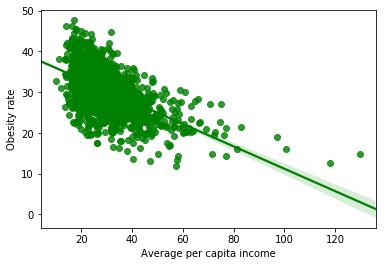

In [23]:
fig = sns.regplot(x=df['w_income'], y=df['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [24]:
df['PCT_OBESE_ADULTS13'].corr(df['w_income'])

-0.5298374391094713

#### Obesity rate vs per capita income -- Northeast US

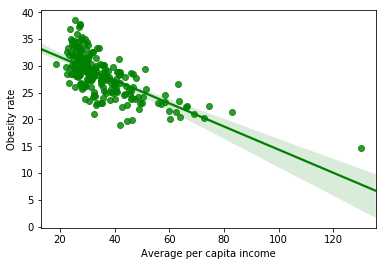

In [25]:
fig = sns.regplot(x=df_northeast['w_income'], y=df_northeast['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [26]:
df_northeast['PCT_OBESE_ADULTS13'].corr(df_northeast['w_income'])

-0.6850095401744947

#### Obesity rate vs per capita income -- Midwest US

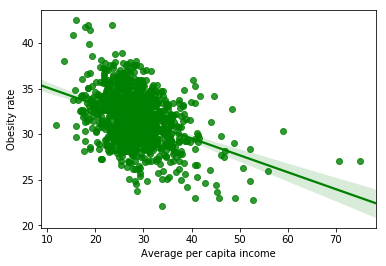

In [27]:
fig = sns.regplot(x=df_midwest['w_income'], y=df_midwest['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [28]:
df_midwest['PCT_OBESE_ADULTS13'].corr(df_midwest['w_income'])

-0.3936179939043222

#### Obesity rate vs per capita income -- South US

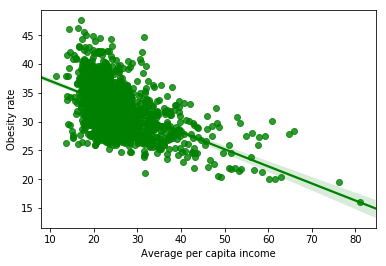

In [29]:
fig = sns.regplot(x=df_south['w_income'], y=df_south['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [30]:
df_south['PCT_OBESE_ADULTS13'].corr(df_south['w_income'])

-0.5247326595332708

#### Obesity rate vs per capita income -- West US

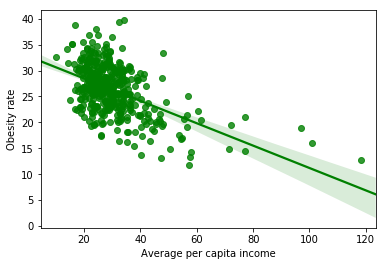

In [31]:
fig = sns.regplot(x=df_west['w_income'], y=df_west['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [32]:
df_west['PCT_OBESE_ADULTS13'].corr(df_west['w_income'])

-0.5111491234069168

#### Diabetes rate vs per capita income -- across US

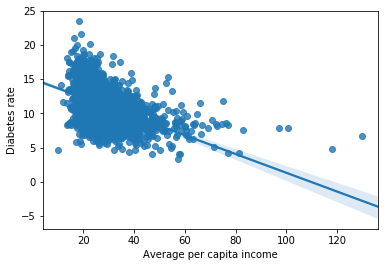

In [33]:
fig = sns.regplot(x=df['w_income'], y=df['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = 'Average per capita income', ylabel = 'Diabetes rate')
plt.show()

In [34]:
df['PCT_DIABETES_ADULTS13'].corr(df['w_income'])

-0.4830514259438034

#### Diabetes rate vs per capita income -- Northeast US

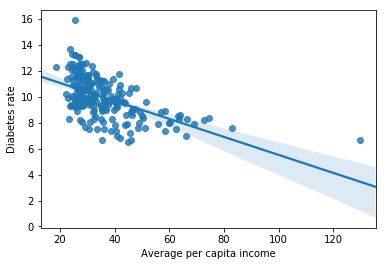

In [35]:
fig = sns.regplot(x=df_northeast['w_income'], y=df_northeast['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = 'Average per capita income', ylabel = 'Diabetes rate')
plt.show()

In [36]:
df_northeast['PCT_DIABETES_ADULTS13'].corr(df_northeast['w_income'])

-0.5594314071139764

#### Diabetes rate vs per capita income -- Midwest US

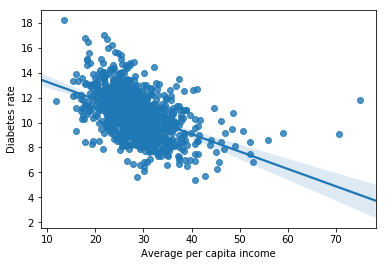

In [37]:
fig = sns.regplot(x=df_midwest['w_income'], y=df_midwest['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = 'Average per capita income', ylabel = 'Diabetes rate')
plt.show()

In [38]:
df_midwest['PCT_DIABETES_ADULTS13'].corr(df_midwest['w_income'])

-0.4724006589572705

#### Diabetes rate vs per capita income -- South US

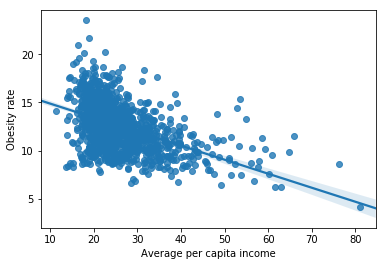

In [39]:
fig = sns.regplot(x=df_south['w_income'], y=df_south['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [40]:
df_south['PCT_DIABETES_ADULTS13'].corr(df_south['w_income'])

-0.47459758607165303

#### Diabetes rate vs per capita income -- West US

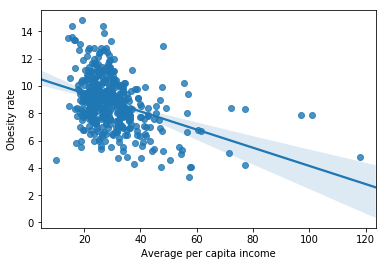

In [41]:
fig = sns.regplot(x=df_west['w_income'], y=df_west['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [42]:
df_west['PCT_DIABETES_ADULTS13'].corr(df_west['w_income'])

-0.385609014898504

#### There is a moderate negative correlation between per capita income and health variables

## We try to get other variables that can, along with per capita income, show a stronger correlation with the health variables

In [43]:
from sklearn.ensemble import RandomForestRegressor

#### Variable importance for random forest fit on income as well as foodatlas variables to predict diabetes & obesity rates across US

In [44]:
rf_model = RandomForestRegressor(n_estimators=100)

rf_df = df.drop(['STATEFIPS'],axis=1)
rf_X = rf_df.drop(['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'Region_id', 'Region'], axis=1)
rf_Y1 = rf_df["PCT_DIABETES_ADULTS13"]
rf_Y2 = rf_df["PCT_OBESE_ADULTS13"]

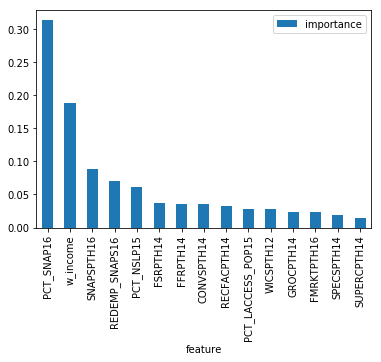

In [45]:
%matplotlib inline

rf_model.fit(rf_X, rf_Y1)
importances_diabetes = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_diabetes = importances_diabetes.sort_values('importance',ascending=False).set_index('feature')
importances_diabetes.plot.bar()
plt.show()

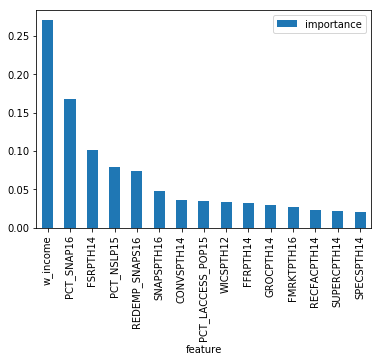

In [46]:
rf_model.fit(rf_X,rf_Y2)
importances_obesity = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_obesity = importances_obesity.sort_values('importance',ascending=False).set_index('feature')
importances_obesity.plot.bar()
plt.show()

#### We find that PCT_SNAP16 (i.e. the % of population that participated in the food assistance program) aslo contributes to predicting the health variable. It adds additional, meaningful 'information' to w_income (i.e. the per capita income). One reason is that very-high-income people can skew the per capita income of a county. So this new variable also reports the no. of poor people that take the assistance of the federal government.

In [47]:
df[['w_income', 'PCT_SNAP16']].corr()

,w_income,PCT_SNAP16
w_income,1.000000,-0.239406
PCT_SNAP16,-0.239406,1.000000


#### Variable importance for random forest fit on income as well as foodatlas variables to predict diabetes & obesity rates in Northeast US

In [70]:
rf_df = df_northeast.drop(['STATEFIPS'],axis=1)
rf_X = rf_df.drop(['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'Region_id', 'Region'], axis=1)
rf_Y1 = rf_df["PCT_DIABETES_ADULTS13"]
rf_Y2 = rf_df["PCT_OBESE_ADULTS13"]

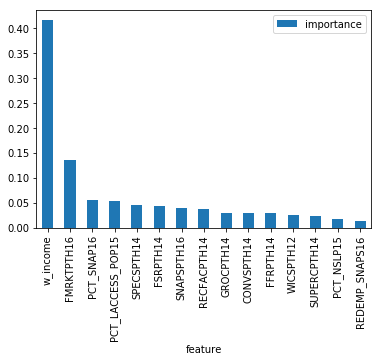

In [71]:
%matplotlib inline

rf_model.fit(rf_X, rf_Y1)
importances_diabetes = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_diabetes = importances_diabetes.sort_values('importance',ascending=False).set_index('feature')
importances_diabetes.plot.bar()
plt.show()

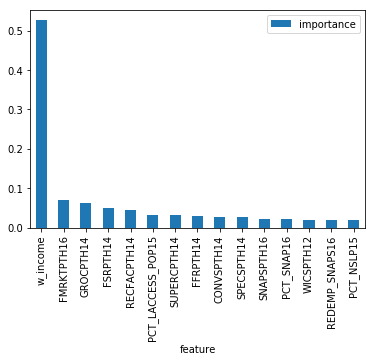

In [72]:
rf_model.fit(rf_X,rf_Y2)
importances_obesity = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_obesity = importances_obesity.sort_values('importance',ascending=False).set_index('feature')
importances_obesity.plot.bar()
plt.show()

#### Variable importance for random forest fit on income as well as foodatlas variables to predict diabetes & obesity rates in Midwest US

In [73]:
rf_df = df_midwest.drop(['STATEFIPS'],axis=1)
rf_X = rf_df.drop(['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'Region_id', 'Region'], axis=1)
rf_Y1 = rf_df["PCT_DIABETES_ADULTS13"]
rf_Y2 = rf_df["PCT_OBESE_ADULTS13"]

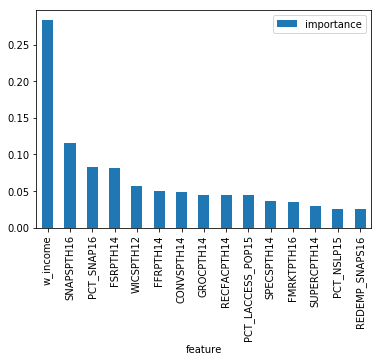

In [74]:
%matplotlib inline

rf_model.fit(rf_X, rf_Y1)
importances_diabetes = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_diabetes = importances_diabetes.sort_values('importance',ascending=False).set_index('feature')
importances_diabetes.plot.bar()
plt.show()

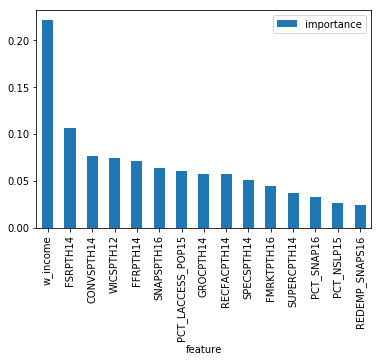

In [75]:
rf_model.fit(rf_X,rf_Y2)
importances_obesity = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_obesity = importances_obesity.sort_values('importance',ascending=False).set_index('feature')
importances_obesity.plot.bar()
plt.show()

#### Variable importance for random forest fit on income as well as foodatlas variables to predict diabetes & obesity rates in South US

In [76]:
rf_df = df_south.drop(['STATEFIPS'],axis=1)
rf_X = rf_df.drop(['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'Region_id', 'Region'], axis=1)
rf_Y1 = rf_df["PCT_DIABETES_ADULTS13"]
rf_Y2 = rf_df["PCT_OBESE_ADULTS13"]

In [87]:
rf_df = df_south.drop(['STATEFIPS'],axis=1)
rf_X = rf_df.drop(['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'REDEMP_SNAPS16', 'SNAPSPTH16', 'Region_id', 'Region'], axis=1)
rf_Y1 = rf_df["PCT_DIABETES_ADULTS13"]
rf_Y2 = rf_df["PCT_OBESE_ADULTS13"]

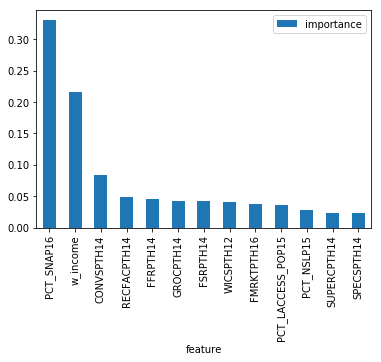

In [88]:
%matplotlib inline

rf_model.fit(rf_X, rf_Y1)
importances_diabetes = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_diabetes = importances_diabetes.sort_values('importance',ascending=False).set_index('feature')
importances_diabetes.plot.bar()
plt.show()

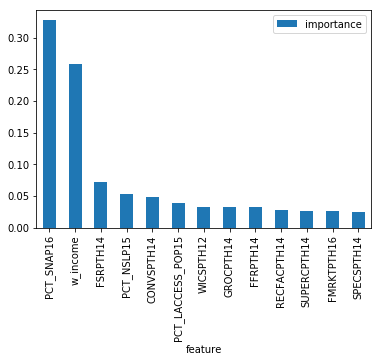

In [89]:
rf_model.fit(rf_X,rf_Y2)
importances_obesity = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_obesity = importances_obesity.sort_values('importance',ascending=False).set_index('feature')
importances_obesity.plot.bar()
plt.show()

#### Variable importance for random forest fit on income as well as foodatlas variables to predict diabetes & obesity rates in West US

In [83]:
rf_df = df_west.drop(['STATEFIPS'],axis=1)
rf_X = rf_df.drop(['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'REDEMP_SNAPS16', 'SNAPSPTH16', 'Region_id', 'Region'], axis=1)
rf_Y1 = rf_df["PCT_DIABETES_ADULTS13"]
rf_Y2 = rf_df["PCT_OBESE_ADULTS13"]

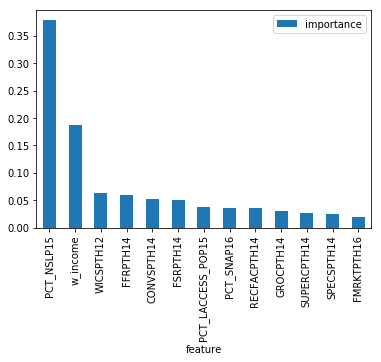

In [84]:
%matplotlib inline

rf_model.fit(rf_X, rf_Y1)
importances_diabetes = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_diabetes = importances_diabetes.sort_values('importance',ascending=False).set_index('feature')
importances_diabetes.plot.bar()
plt.show()

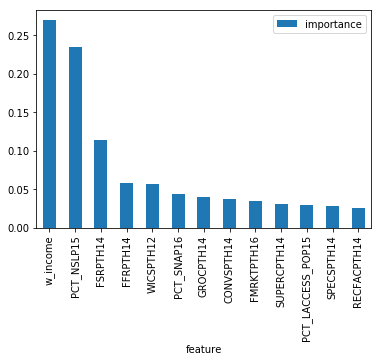

In [85]:
rf_model.fit(rf_X,rf_Y2)
importances_obesity = pd.DataFrame({'feature':rf_X.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances_obesity = importances_obesity.sort_values('importance',ascending=False).set_index('feature')
importances_obesity.plot.bar()
plt.show()

#### Obesity rate vs SNAP participation -- across US

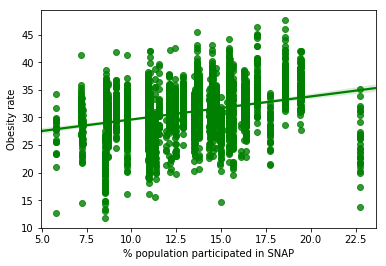

In [48]:
fig = sns.regplot(x=df['PCT_SNAP16'], y=df['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = '% population participated in SNAP', ylabel = 'Obesity rate')
plt.show()

In [49]:
df['PCT_OBESE_ADULTS13'].corr(df['PCT_SNAP16'])

0.29445873260690036

#### Obesity rate vs SNAP participation -- Northeast US

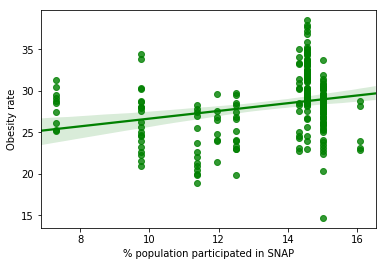

In [50]:
fig = sns.regplot(x=df_northeast['PCT_SNAP16'], y=df_northeast['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = '% population participated in SNAP', ylabel = 'Obesity rate')
plt.show()

In [51]:
df_northeast['PCT_OBESE_ADULTS13'].corr(df_northeast['PCT_SNAP16'])

0.25297959338733594

#### Obesity rate vs SNAP participation -- Midwest US

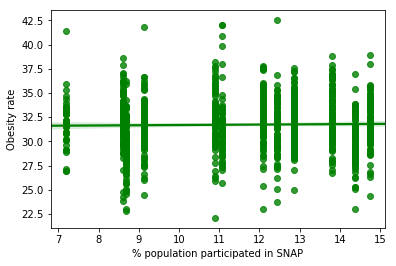

In [52]:
fig = sns.regplot(x=df_midwest['PCT_SNAP16'], y=df_midwest['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = '% population participated in SNAP', ylabel = 'Obesity rate')
plt.show()

In [53]:
df_midwest['PCT_OBESE_ADULTS13'].corr(df_midwest['PCT_SNAP16'])

0.018390974581502798

#### Obesity rate vs SNAP participation -- South US

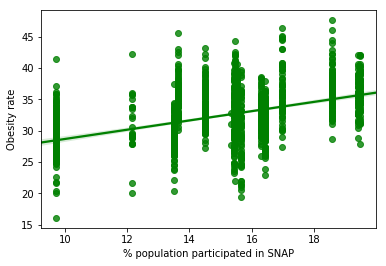

In [54]:
fig = sns.regplot(x=df_south['PCT_SNAP16'], y=df_south['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = '% population participated in SNAP', ylabel = 'Obesity rate')
plt.show()

In [55]:
df_south['PCT_OBESE_ADULTS13'].corr(df_south['PCT_SNAP16'])

0.42524170362171804

#### Obesity rate vs SNAP participation -- West US

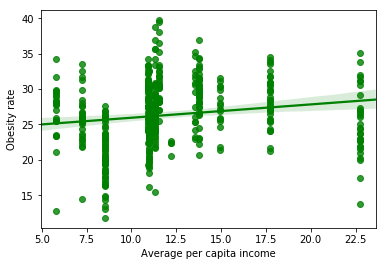

In [56]:
fig = sns.regplot(x=df_west['PCT_SNAP16'], y=df_west['PCT_OBESE_ADULTS13'], fit_reg=True, color = 'g')
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [57]:
df_west['PCT_OBESE_ADULTS13'].corr(df_west['PCT_SNAP16'])

0.1641130374050544

#### Diabetes rate vs SNAP participation -- across US

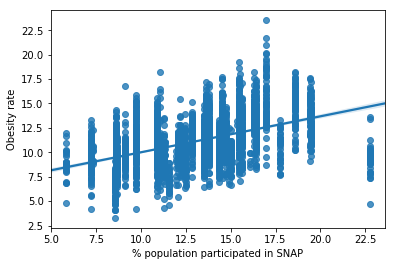

In [58]:
fig = sns.regplot(x=df['PCT_SNAP16'], y=df['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = '% population participated in SNAP', ylabel = 'Obesity rate')
plt.show()

In [59]:
df['PCT_DIABETES_ADULTS13'].corr(df['PCT_SNAP16'])

0.4716100839874381

#### Diabetes rate vs SNAP participation -- Northeast US

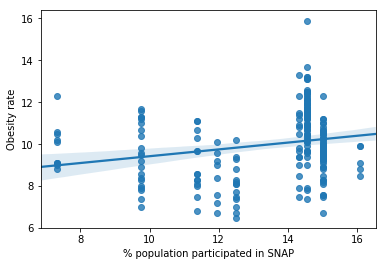

In [60]:
fig = sns.regplot(x=df_northeast['PCT_SNAP16'], y=df_northeast['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = '% population participated in SNAP', ylabel = 'Obesity rate')
plt.show()

In [61]:
df_northeast['PCT_DIABETES_ADULTS13'].corr(df_northeast['PCT_SNAP16'])

0.22446766864961934

#### Diabetes rate vs SNAP participation -- Midwest US

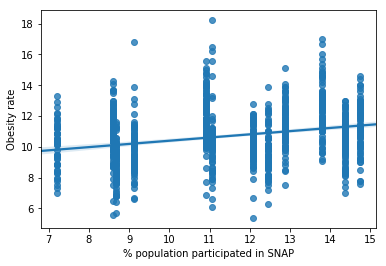

In [62]:
fig = sns.regplot(x=df_midwest['PCT_SNAP16'], y=df_midwest['PCT_DIABETES_ADULTS13'])
fig.set(xlabel = '% population participated in SNAP', ylabel = 'Obesity rate')
plt.show()

In [63]:
df_midwest['PCT_DIABETES_ADULTS13'].corr(df_midwest['PCT_SNAP16'])

0.26755211935975143

#### Diabetes rate vs SNAP participation -- South US

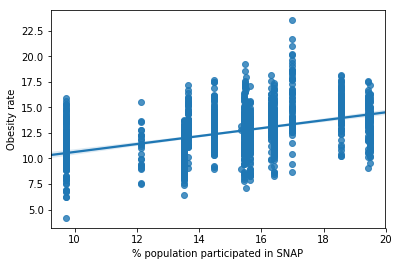

In [64]:
fig = sns.regplot(x=df_south['PCT_SNAP16'], y=df_south['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = '% population participated in SNAP', ylabel = 'Obesity rate')
plt.show()

In [65]:
df_south['PCT_DIABETES_ADULTS13'].corr(df_south['PCT_SNAP16'])

0.4125026394073378

#### Diabetes rate vs SNAP participation -- West US

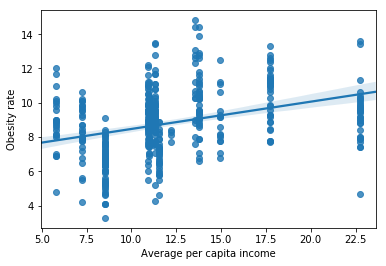

In [66]:
fig = sns.regplot(x=df_west['PCT_SNAP16'], y=df_west['PCT_DIABETES_ADULTS13'], fit_reg=True)
fig.set(xlabel = 'Average per capita income', ylabel = 'Obesity rate')
plt.show()

In [67]:
df_west['PCT_DIABETES_ADULTS13'].corr(df_west['PCT_SNAP16'])

0.3390062230402889

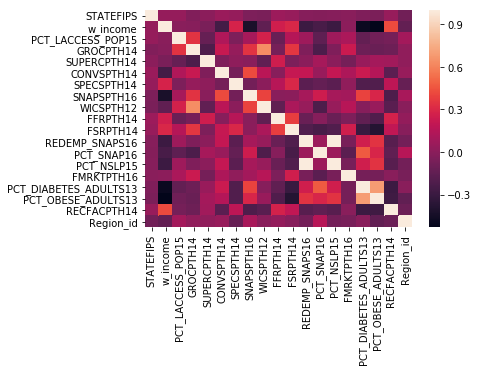

In [68]:
corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()